In [1]:
#Librairies for maths
import numpy as np
from matplotlib import pyplot as plt

#Libraries for deep learning
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
#The dataset is divided in batches to reduce the computation
BatchSize = 100

#Datasets download
TrainingDataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
TestDataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

#The datasets are converted into a loader
TrainLoader = torch.utils.data.DataLoader(dataset = TrainingDataset, shuffle = True, batch_size = BatchSize)
TestLoader = torch.utils.data.DataLoader(dataset = TestDataset, shuffle = True, batch_size = BatchSize)

100%|██████████| 9912422/9912422 [00:00<00:00, 105432198.03it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 80918967.15it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26374083.88it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3960608.89it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
#Size of a picture (input) and number of classes (output)
ImageSize = 784 
SizeClasses = 10 

In [4]:
#MLP defined with 2 hidden layers of 200 and 100 neurons
MyModel = nn.Sequential(nn.Linear(ImageSize, 200),
                      nn.ReLU(),
                      nn.Linear(200, 100),
                      nn.ReLU(),
                      nn.Linear(100, SizeClasses),
                      nn.LogSoftmax(dim=1))

In [5]:
#Parameters for the training
Epochs = 20
LearningRate = 0.001
#Adam improve the gradient descent convergence
Optimizer = torch.optim.Adam(MyModel.parameters(), lr=LearningRate)
LossFunction = nn.CrossEntropyLoss()

In [6]:
#For each epoch, the model is updated
for Epoch in range(Epochs):
    Sum = 0
    #The dataset is divided in batches
    for Iter, (X, y) in enumerate(TrainLoader):
        #Picture 28*28 to Vector of size 784
        X = X.view(X.shape[0], -1)

        #Model prediction
        Ypred = MyModel(X)

        #Gradient descent
        Optimizer.zero_grad()
        MyLoss = LossFunction(Ypred,y)
        MyLoss.backward()
        Optimizer.step()

        Sum += MyLoss.item()

    #Display the current loss
    Sum /= len(TrainLoader)
    print(Sum)

#The model is finally trained

0.34919208832706017
0.13460931699723006
0.09288180936438342
0.06653107033111155
0.05216991332980494
0.04108454621746205
0.031966762927283225
0.02607043791426501
0.021941911855828947
0.01714015686438264
0.015966313265331943
0.013827226538148048
0.011801488179868707
0.011473347666105837
0.009446584657028629
0.008594262287563955
0.00810965238068699
0.00954967125606951
0.008406155091179243
0.006376373757501217


In [7]:
#Function to display 5 MNIST pictures
def Display5ImagesMNIST(Batch, LabelBatch, Pred):
    Fig, Axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
    for i in range(3):
      Img = Batch[i].squeeze()
      label = LabelBatch[i]
      pred = Pred[i]
      Axs[i].set_title("real: " + str(label.numpy()) + ", pred: " + str(pred.numpy()))
      Axs[i].imshow(Img, cmap="gray")
    plt.tight_layout()
    plt.show()
    return

In [8]:
#Function to test the model
def Test(TestLoader, model):
  Correct = 0
  SizeLoader = len(TestLoader.dataset)
  
  #No need to compute the gradient descent
  with torch.no_grad():
    
    #Computation of the accuracy 
    for X, y in TestLoader:
        #Picture 28*28 to Vector of size 784
        FlattenX = X.view(X.shape[0], -1)
        #Model prediction
        Ypred = model(FlattenX)
        #If the prediciton is equal to the reality
        Correct += (Ypred.argmax(1) == y).type(torch.float).sum().item()
    Correct /= SizeLoader

    #Display accuracy
    print(f"Test Error: \n Accuracy: {(100*Correct):>0.1f}%")

  #Display 5 pictures
  X, y  = next(iter(TestLoader))
  FlattenX = X.view(X.shape[0], -1)
  Ypred = model(FlattenX)
  
  Pred = Ypred.argmax(1)
  Display5ImagesMNIST(X, y, Pred)

Test Error: 
 Accuracy: 98.0%


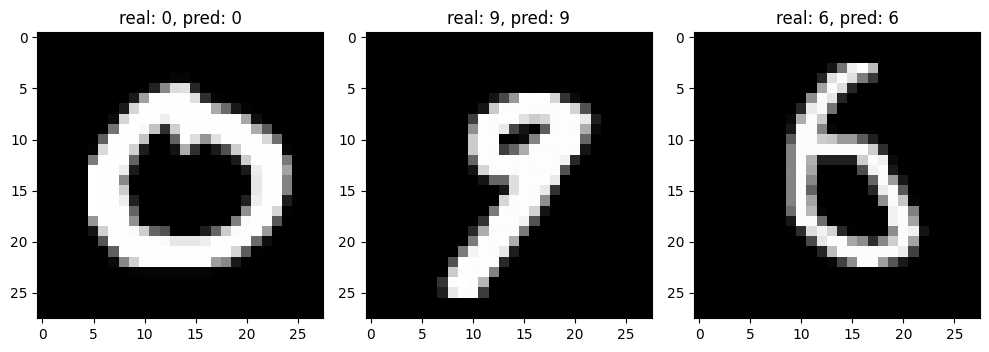

In [9]:
#Exuction of the function to test the model
Test(TestLoader, MyModel)